In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('D:/task1/Mall_Customers.csv')

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.shape

(200, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
new_df=df.iloc[:,[3,4]].values

In [25]:
from sklearn.cluster import KMeans
wcss=[]

In [26]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

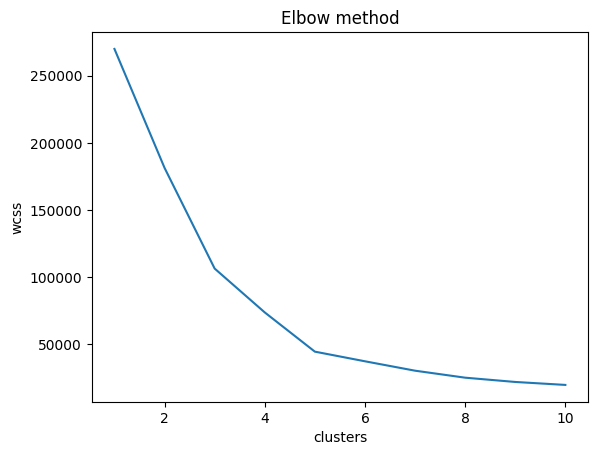

In [28]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [29]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [30]:
y_kmeans=kmeansmodel.fit_predict(new_df)

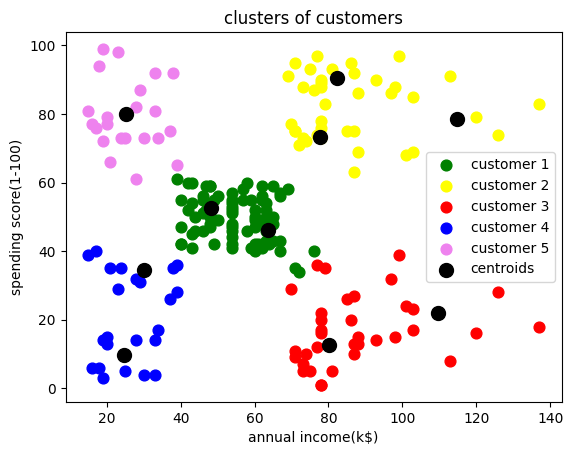

In [32]:
plt.scatter(new_df[y_kmeans==0,0],
            new_df[y_kmeans==0,1],
            s=60,c='green',label='customer 1')
plt.scatter(new_df[y_kmeans==1,0],
            new_df[y_kmeans==1,1],
            s=60,c='yellow',label='customer 2')
plt.scatter(new_df[y_kmeans==2,0],
            new_df[y_kmeans==2,1],
            s=60,c='red',label='customer 3')
plt.scatter(new_df[y_kmeans==3,0],
            new_df[y_kmeans==3,1],
            s=60,c='blue',label='customer 4')
plt.scatter(new_df[y_kmeans==4,0],
            new_df[y_kmeans==4,1],
            s=60,c='violet',label='customer 5')
#cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100,c='black',label='centroids')
plt.title('clusters of customers')
plt.xlabel('annual income(k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()